<a href="https://colab.research.google.com/github/kavita07lamani/Stock-Price-Prediction/blob/main/Forecasting_stock_using_bidirdctional_Rnn_and_lstm_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all dependecies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense

Fetching  facebook Data

In [ ]:
meta_data=pd.read_csv('/content/META.csv')
meta_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,128.990005,137.509995,128.559998,135.679993,135.679993,28146200
1,2019-01-03,134.690002,137.169998,131.119995,131.740005,131.740005,22717900
2,2019-01-04,134.009995,138.000000,133.750000,137.949997,137.949997,29002100
3,2019-01-07,137.559998,138.869995,135.910004,138.050003,138.050003,20089300
4,2019-01-08,139.889999,143.139999,139.539993,142.529999,142.529999,26263800


In [ ]:
meta_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1232,2023-11-22,339.209991,342.920013,338.579987,341.489990,341.489990,10702700
1233,2023-11-24,340.130005,341.859985,336.769989,338.230011,338.230011,5467500
1234,2023-11-27,336.179993,339.899994,334.200012,334.700012,334.700012,15684500
1235,2023-11-28,333.399994,339.380005,333.399994,338.989990,338.989990,12637200
1236,2023-11-29,339.690002,339.899994,330.779999,332.200012,332.200012,16024500


In [ ]:
#checking number of rows and colomuns
meta_data.shape

(1237, 7)

In [ ]:
# convert date object to datetime
from datetime import datetime
meta_data['Date']=pd.to_datetime(meta_data['Date'])

meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237 entries, 0 to 1236
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1237 non-null   datetime64[ns]
 1   Open       1237 non-null   float64       
 2   High       1237 non-null   float64       
 3   Low        1237 non-null   float64       
 4   Close      1237 non-null   float64       
 5   Adj Close  1237 non-null   float64       
 6   Volume     1237 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 67.8 KB


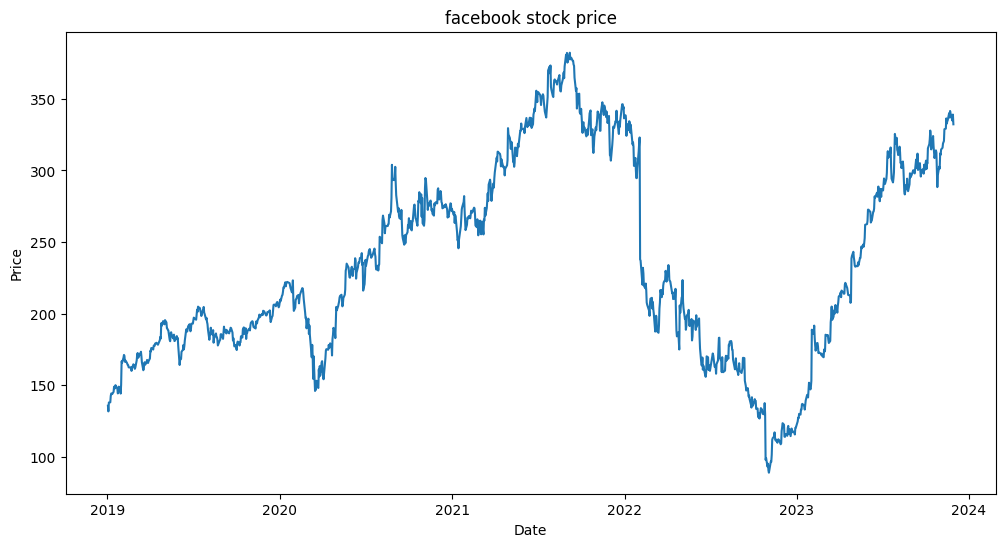

In [ ]:
#visualization facebook data set
x=meta_data['Date']
y=meta_data['Close']
plt_1 = plt.figure(figsize=(12, 6))
plt.plot(x,y)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('facebook stock price')
plt.show()

Prepocessing data set

In [ ]:
#feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(meta_data['Close'].values.reshape(-1, 1))

In [ ]:
#creating sequence for lstm and bidirection rnn
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length)])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 30
X, y = create_sequences(scaled_data, sequence_length)

In [ ]:
#splitting data into trainning and testing
train_size = int(len(X) * 0.62)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
#reshaping the data for lstm
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

Buliding the LSTM model

In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model.add(Bidirectional(LSTM(units=50)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#trainning the model
model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
12/12 [==============================] - 9s 60ms/step - loss: 0.0778
Epoch 2/10
12/12 [==============================] - 1s 58ms/step - loss: 0.0111
Epoch 3/10
12/12 [==============================] - 1s 59ms/step - loss: 0.0048
Epoch 4/10
12/12 [==============================] - 1s 60ms/step - loss: 0.0033
Epoch 5/10
12/12 [==============================] - 1s 61ms/step - loss: 0.0026
Epoch 6/10
12/12 [==============================] - 1s 59ms/step - loss: 0.0022
Epoch 7/10
12/12 [==============================] - 1s 61ms/step - loss: 0.0021
Epoch 8/10
12/12 [==============================] - 1s 61ms/step - loss: 0.0021
Epoch 9/10
12/12 [==============================] - 1s 59ms/step - loss: 0.0021
Epoch 10/10
12/12 [==============================] - 1s 61ms/step - loss: 0.0019


In [ ]:
#predicting value
predictions = model.predict(X_test)

15/15 [==============================] - 2s 14ms/step


Evalveting the model

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test,predictions))

0.07079299789346888

In [ ]:
# Inverse transform the predictions values
predicted_prices = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))


Visualization the result

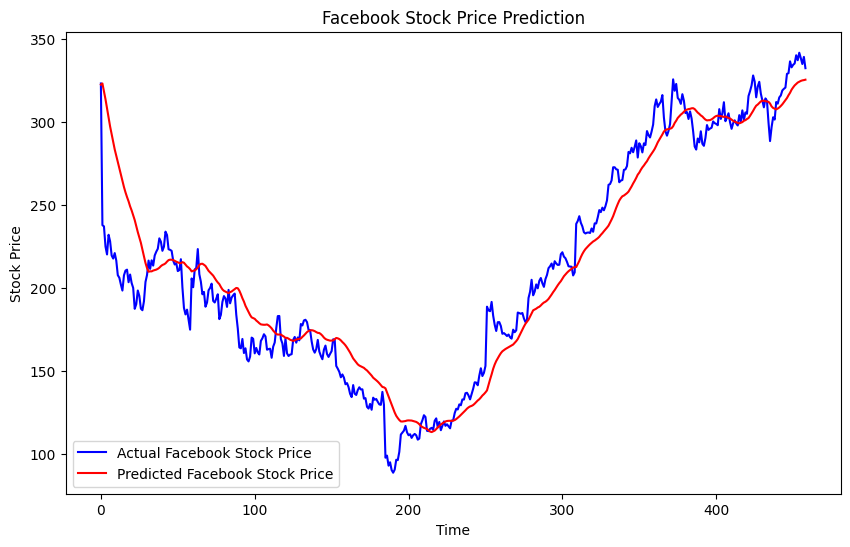

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(actual_prices, color='blue', label='Actual Facebook Stock Price')
plt.plot(predicted_prices, color='red', label='Predicted Facebook Stock Price')
plt.title('Facebook Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()